In [63]:
import os
import pandas as pd
import numpy as np
import sys
import openpyxl

from datetime import datetime
import datetime
from datetime import timedelta

from tqdm import tqdm

import matplotlib

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from matplotlib import font_manager, rc
rc('font',family="AppleGothic")
plt.rcParams["font.family"]="AppleGothic" #plt 한글꺠짐
plt.rcParams["font.family"]="Arial" #외국어꺠짐
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
plt.rc('figure', figsize=(15,8))

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid') #sns 한글깨짐
#그래프 세팅
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }

#마이너스 폰트
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
#판다스 컬럼 다보기
pd.set_option('display.max_columns', 100)

#시각화?
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
#elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    #plt.rc('font', family='Malgun Gothic')



# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [64]:
sns.set_palette('GnBu_r')

In [65]:
# 비낙상 환자 데이터 로드
nonfall_df = pd.read_csv('/Users/yena/Library/Mobile Documents/com~apple~CloudDocs/척척석사/코드/[1109]FINAL_NONE.csv')
nonfall = nonfall_df.copy()
print(nonfall.shape)
nonfall.head()

(123170, 18)


,Unnamed: 0,등록번호,평가일자,Cluster,키,몸무게,통증강도,욕창_행동,욕창_영양,MFS,"ADL_배뇨, 배변",ADL_체위변경,ADL_침상 밖으로 이동,ADL_식사섭취,호흡 간호_비침습적 산소 투여,total_cci,성별,나이
0,0,1034087,20170711,L,151.95,68.0,0,0,0,45,0,0,1,1,0,2.0,F,49
1,6,1034087,20170711,L,151.95,68.0,0,0,0,25,0,0,1,1,0,2.0,F,49
2,12,1034087,20170711,L,151.95,68.0,5,0,0,45,0,0,1,1,0,2.0,F,49
3,18,1034087,20170711,L,151.95,68.0,5,0,0,25,0,0,1,1,0,2.0,F,49
4,24,1034087,20170711,C,151.95,68.0,0,0,0,45,0,0,1,1,0,2.0,F,49


In [66]:
len(nonfall['등록번호'].unique())

3178

In [67]:
# cluster, cluster_c랑 분리 
nonfall = nonfall.drop(columns=['Cluster'])
nonfall

,Unnamed: 0,등록번호,평가일자,키,몸무게,통증강도,욕창_행동,욕창_영양,MFS,"ADL_배뇨, 배변",ADL_체위변경,ADL_침상 밖으로 이동,ADL_식사섭취,호흡 간호_비침습적 산소 투여,total_cci,성별,나이
0,0,1034087,20170711,151.95,68.0,0,0,0,45,0,0,1,1,0,2.0,F,49
1,6,1034087,20170711,151.95,68.0,0,0,0,25,0,0,1,1,0,2.0,F,49
2,12,1034087,20170711,151.95,68.0,5,0,0,45,0,0,1,1,0,2.0,F,49
3,18,1034087,20170711,151.95,68.0,5,0,0,25,0,0,1,1,0,2.0,F,49
4,24,1034087,20170711,151.95,68.0,0,0,0,45,0,0,1,1,0,2.0,F,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123165,9682717,792954,20191219,157.90,54.0,2,0,0,35,0,0,0,0,0,0.0,F,62
123166,9682723,831485,20210809,0.00,0.0,0,1,0,60,0,0,1,0,0,0.0,M,75
123167,9682741,831485,20210809,0.00,0.0,0,1,0,75,0,0,1,0,0,0.0,M,75
123168,9682759,202449,20210817,153.80,52.0,0,0,0,50,0,0,0,0,0,3.0,F,52


In [68]:
nonfall.columns

Index(['Unnamed: 0', '등록번호', '평가일자', '키', '몸무게', '통증강도', '욕창_행동', '욕창_영양',
       'MFS', 'ADL_배뇨, 배변', 'ADL_체위변경', 'ADL_침상 밖으로 이동', 'ADL_식사섭취',
       '호흡 간호_비침습적 산소 투여', 'total_cci', '성별', '나이'],
      dtype='object')

In [69]:
nonfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123170 entries, 0 to 123169
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        123170 non-null  int64  
 1   등록번호              123170 non-null  int64  
 2   평가일자              123170 non-null  int64  
 3   키                 123170 non-null  float64
 4   몸무게               123170 non-null  float64
 5   통증강도              123170 non-null  object 
 6   욕창_행동             123170 non-null  int64  
 7   욕창_영양             123170 non-null  int64  
 8   MFS               123170 non-null  int64  
 9   ADL_배뇨, 배변        123170 non-null  int64  
 10  ADL_체위변경          123170 non-null  int64  
 11  ADL_침상 밖으로 이동     123170 non-null  int64  
 12  ADL_식사섭취          123170 non-null  int64  
 13  호흡 간호_비침습적 산소 투여  123170 non-null  int64  
 14  total_cci         123170 non-null  float64
 15  성별                123170 non-null  object 
 16  나이                12

## **MFS**

<AxesSubplot:xlabel='MFS'>

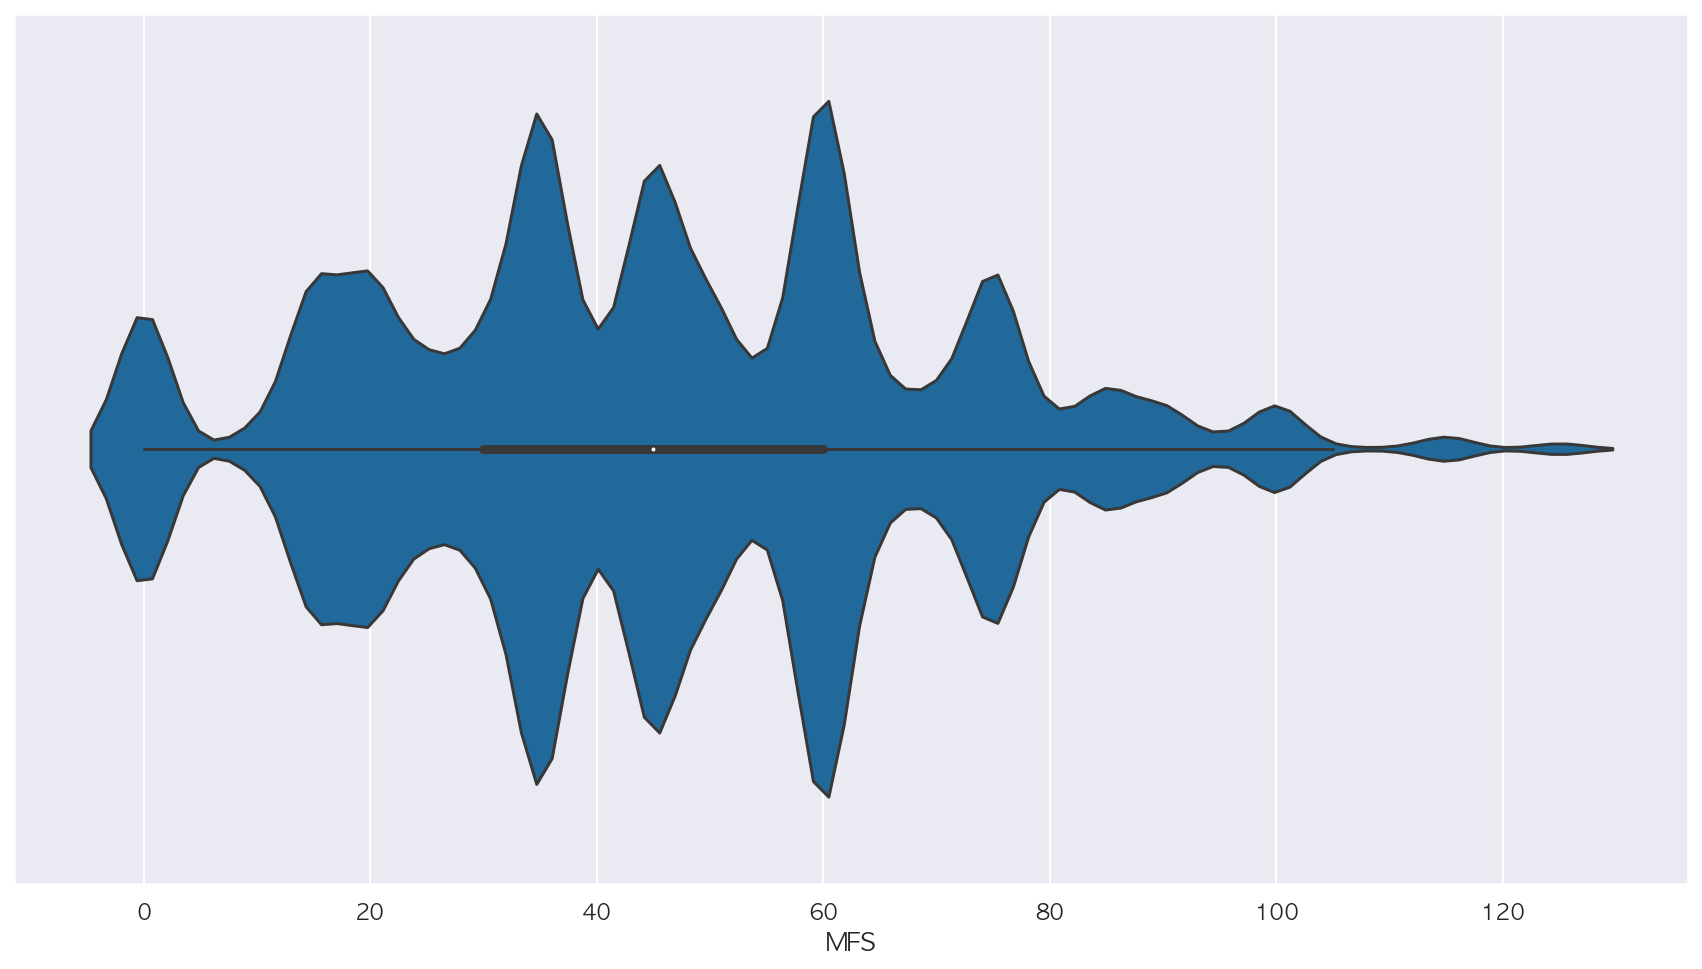

In [70]:
sns.violinplot(x=nonfall['MFS'])

In [71]:
nonfall['MFS'].describe()

count    123170.000000
mean         45.417228
std          24.467812
min           0.000000
25%          30.000000
50%          45.000000
75%          60.000000
max         125.000000
Name: MFS, dtype: float64

In [72]:
def high(x):
    if x >= 51 :
        high = 'high'
    else:
        high = 'not high'
    
    return high

In [73]:
nonfall['high'] = nonfall['MFS'].apply(lambda x:high(x))
nonfall.head()

,Unnamed: 0,등록번호,평가일자,키,몸무게,통증강도,욕창_행동,욕창_영양,MFS,"ADL_배뇨, 배변",ADL_체위변경,ADL_침상 밖으로 이동,ADL_식사섭취,호흡 간호_비침습적 산소 투여,total_cci,성별,나이,high
0,0,1034087,20170711,151.95,68.0,0,0,0,45,0,0,1,1,0,2.0,F,49,not high
1,6,1034087,20170711,151.95,68.0,0,0,0,25,0,0,1,1,0,2.0,F,49,not high
2,12,1034087,20170711,151.95,68.0,5,0,0,45,0,0,1,1,0,2.0,F,49,not high
3,18,1034087,20170711,151.95,68.0,5,0,0,25,0,0,1,1,0,2.0,F,49,not high
4,24,1034087,20170711,151.95,68.0,0,0,0,45,0,0,1,1,0,2.0,F,49,not high


In [74]:
high = nonfall[['등록번호', 'high']]
high = high.drop_duplicates()
high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4281 entries, 0 to 123169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   등록번호    4281 non-null   int64 
 1   high    4281 non-null   object
dtypes: int64(1), object(1)
memory usage: 100.3+ KB


<AxesSubplot:xlabel='high', ylabel='Count'>

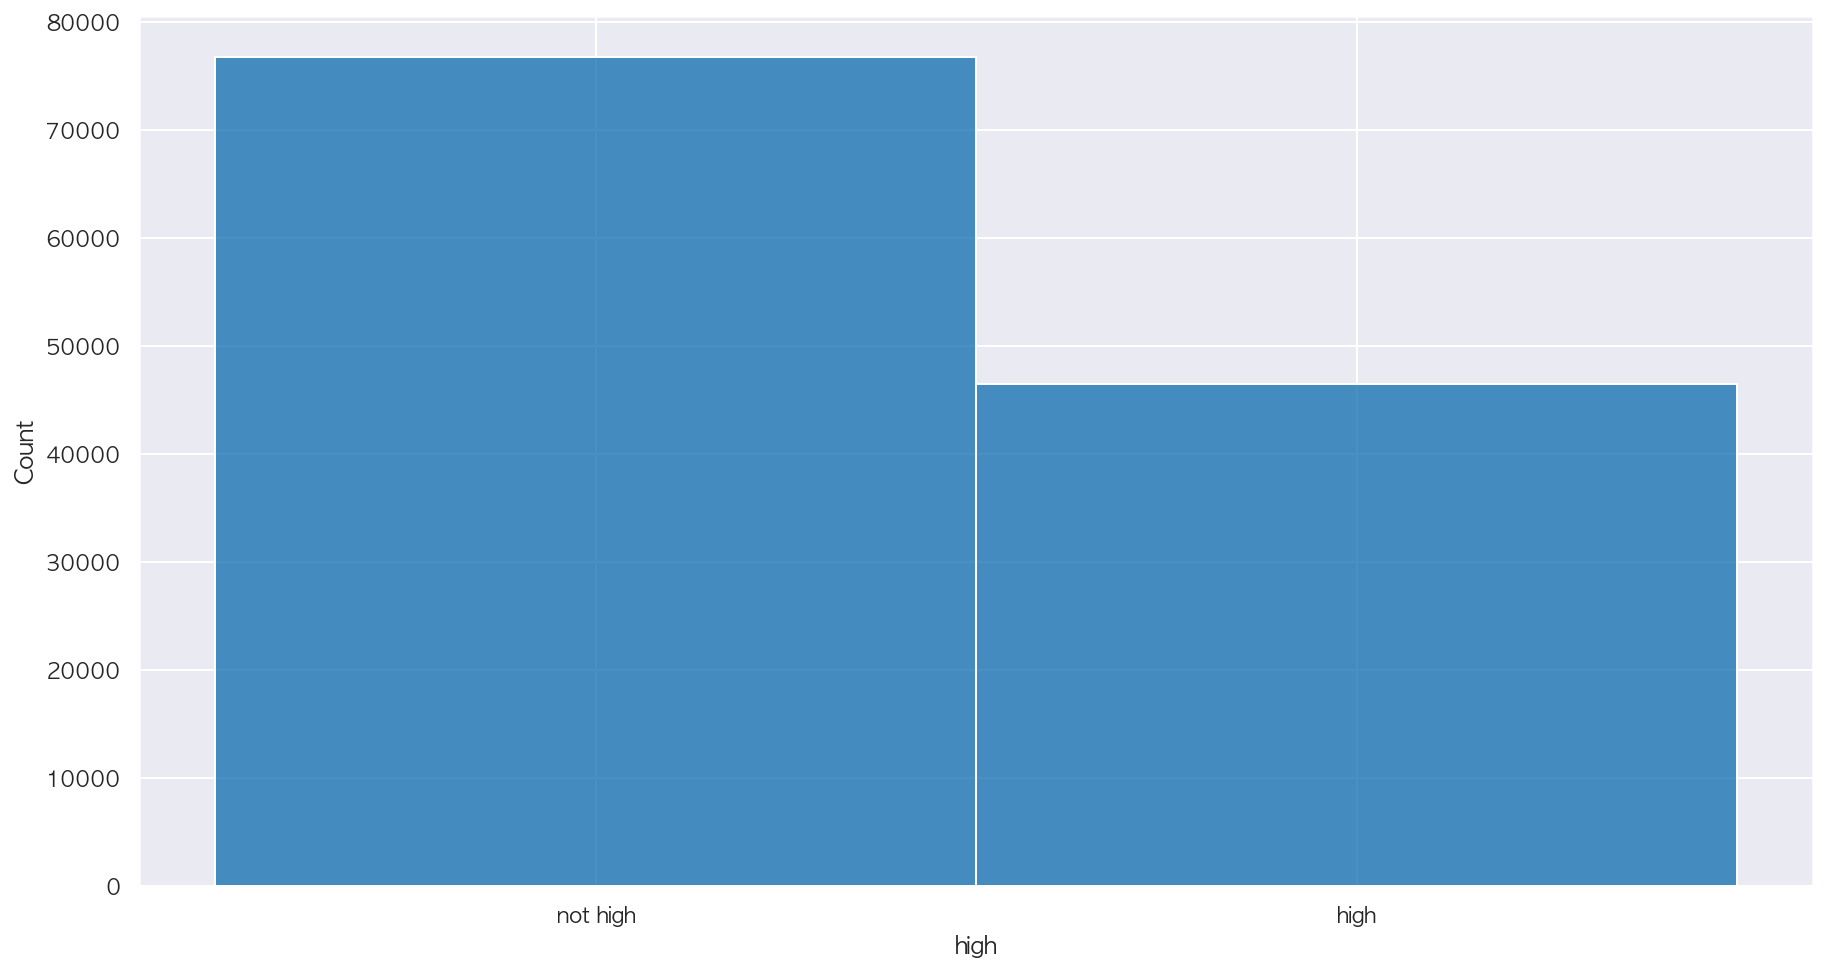

In [75]:
sns.histplot(nonfall['high'])

In [76]:
high_df = nonfall[['등록번호','high']]
high_df = high_df.drop_duplicates()

In [77]:

high_df['high'].value_counts()

not high    2593
high        1688
Name: high, dtype: int64

## **키, 몸무게, 성별, 나이**

In [78]:
basic = nonfall[['등록번호','키', '몸무게', '성별', '나이']]
basic = basic.drop_duplicates()
basic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4927 entries, 0 to 123169
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록번호    4927 non-null   int64  
 1   키       4927 non-null   float64
 2   몸무게     4927 non-null   float64
 3   성별      4927 non-null   object 
 4   나이      4927 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 231.0+ KB


In [79]:
basic['키'] = basic['키'][basic['키']<200 ] 
basic['키'] = basic['키'][basic['키']>8 ] 
basic['키'].describe()

count    3732.000000
mean      148.784009
std        24.683109
min        51.000000
25%       144.252500
50%       156.120000
75%       164.460000
max       198.090000
Name: 키, dtype: float64

<AxesSubplot:xlabel='키'>

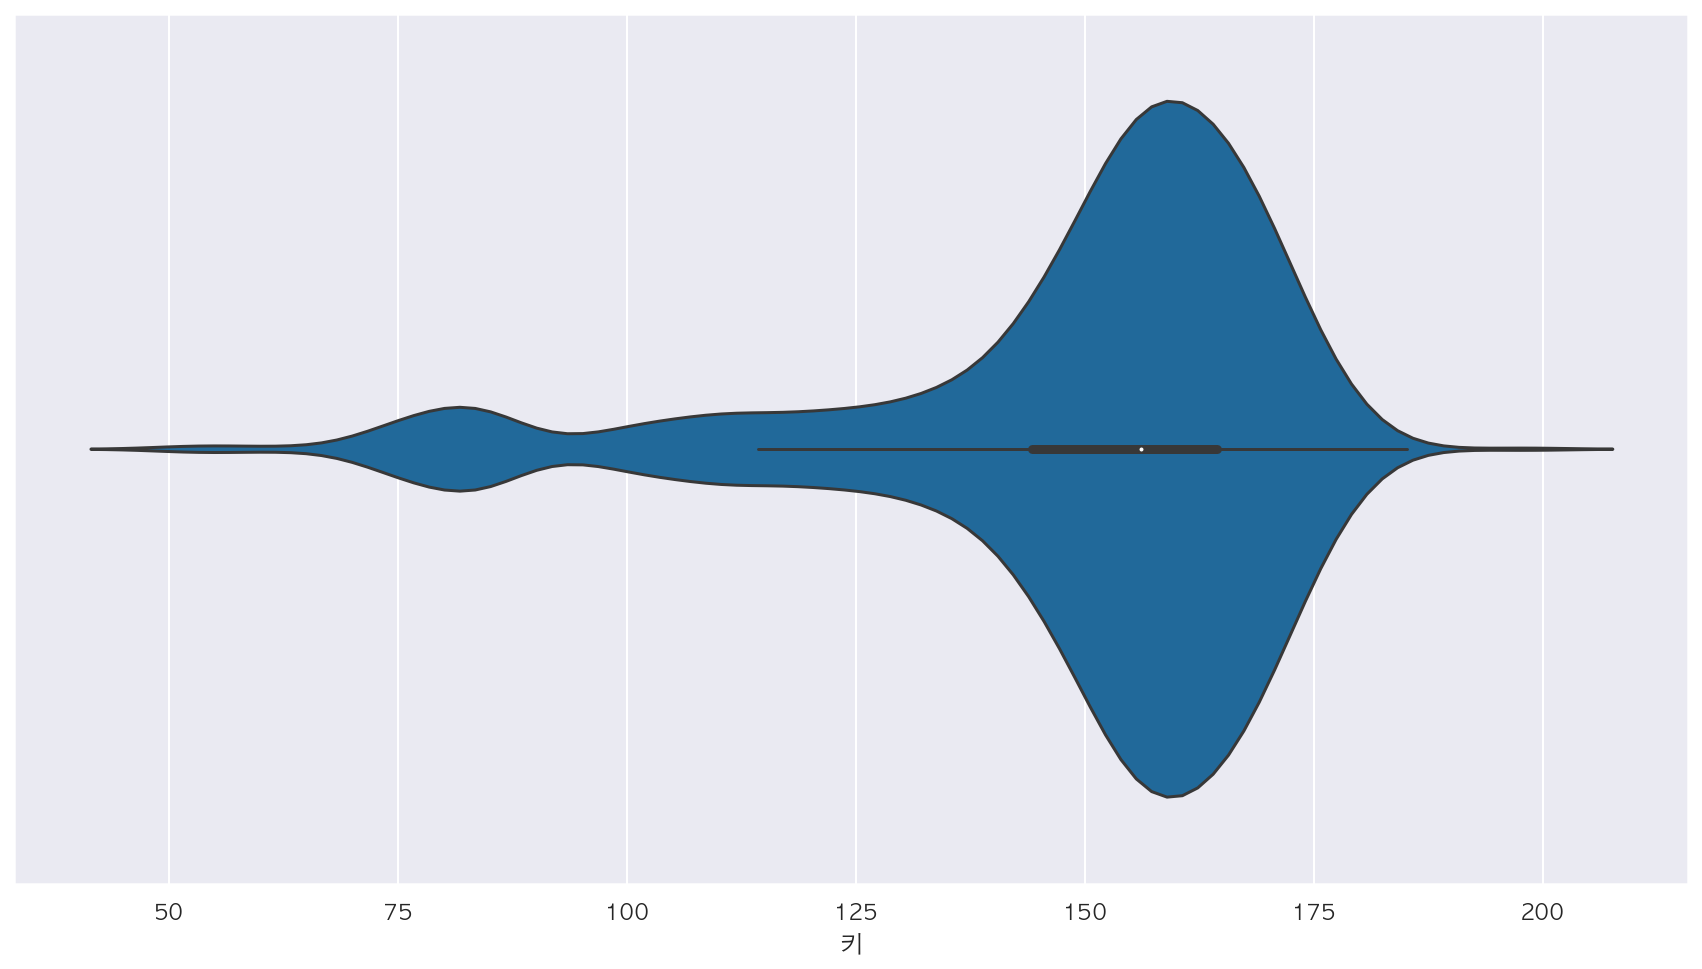

In [80]:
sns.violinplot(x=basic['키'])

In [81]:
basic['몸무게'] = basic['몸무게'][basic['몸무게'] > 0]

<AxesSubplot:xlabel='몸무게'>

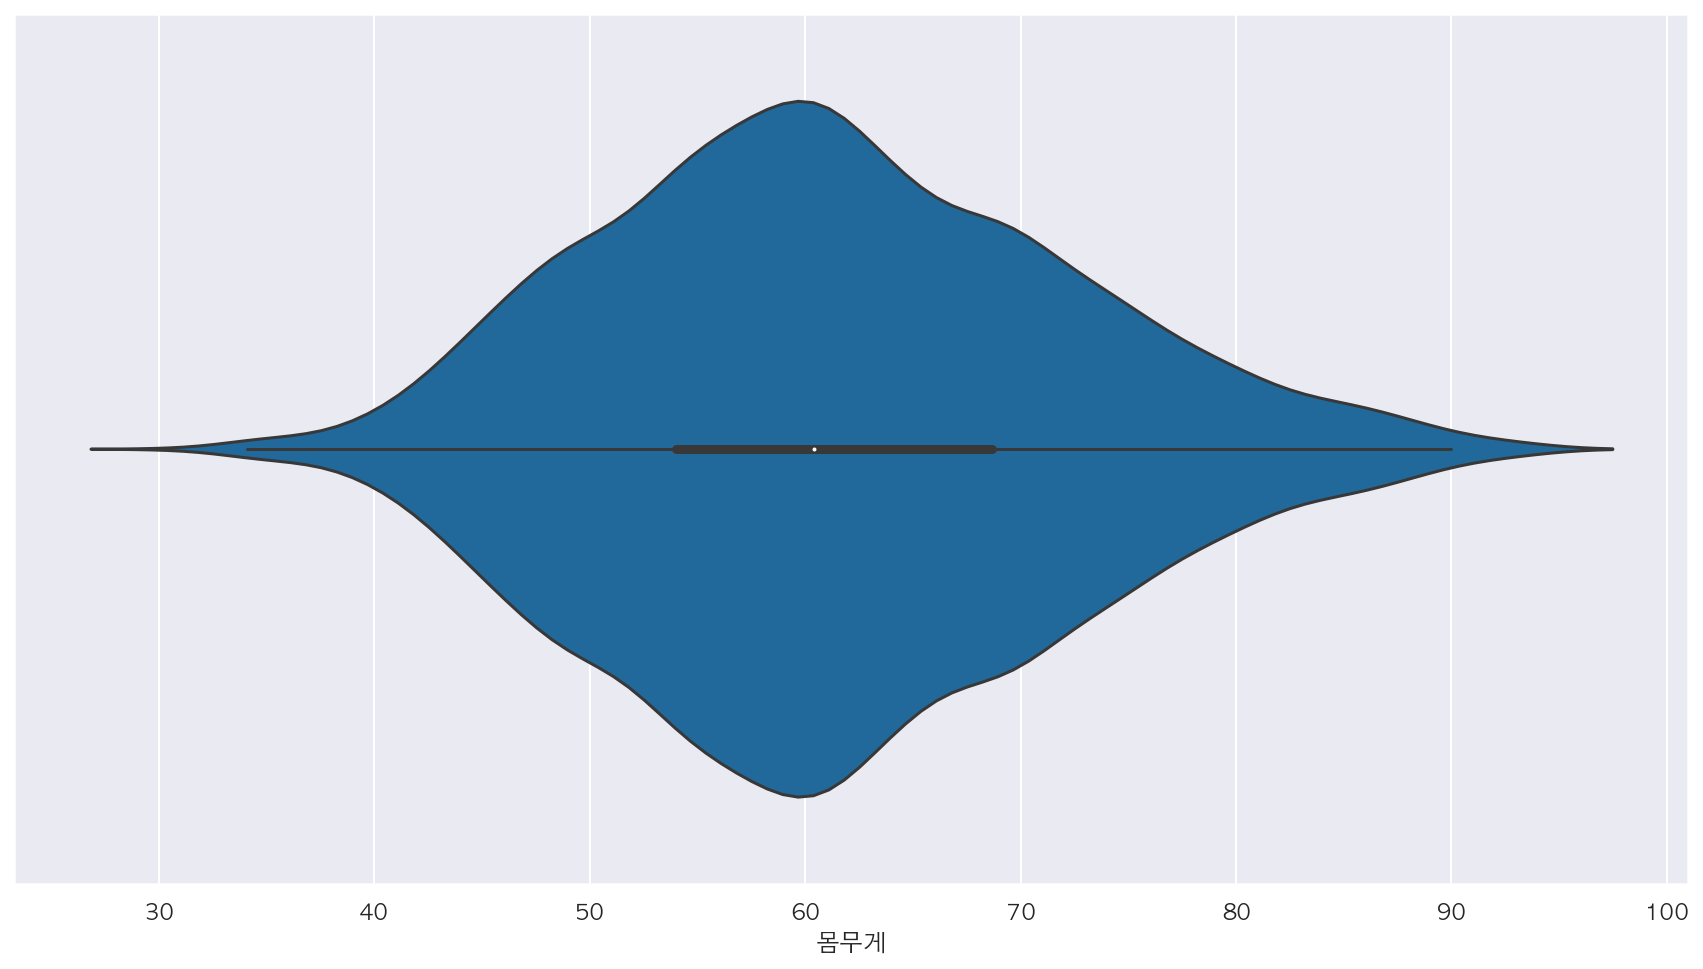

In [82]:
sns.violinplot(x=basic['몸무게'])

In [83]:
basic['몸무게'].describe()

count    3753.000000
mean       61.357168
std        10.820262
min        31.000000
25%        54.000000
50%        60.400000
75%        68.700000
max        93.300000
Name: 몸무게, dtype: float64

In [84]:
sex = basic[['등록번호', '성별']]
sex = sex.drop_duplicates()
sex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3178 entries, 0 to 123169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   등록번호    3178 non-null   int64 
 1   성별      3178 non-null   object
dtypes: int64(1), object(1)
memory usage: 74.5+ KB


/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='성별', ylabel='count'>

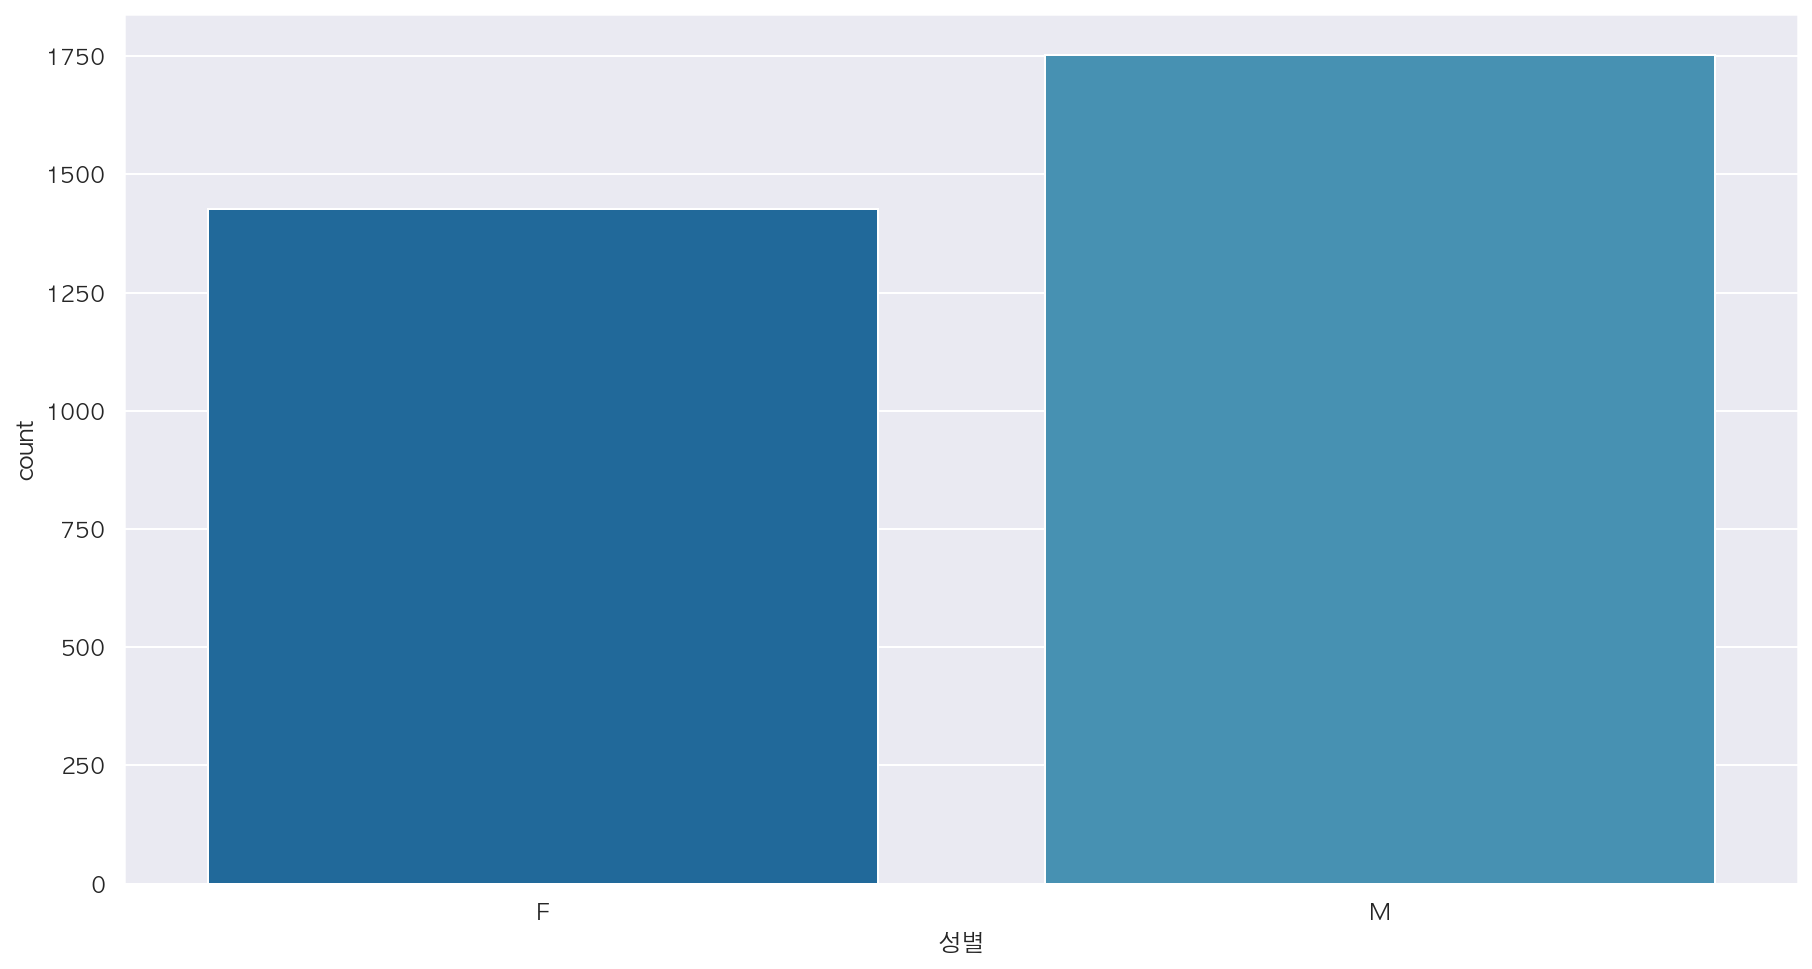

In [85]:
sns.countplot(sex['성별'])

In [86]:
sex['성별'].value_counts()

M    1752
F    1426
Name: 성별, dtype: int64

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='나이'>

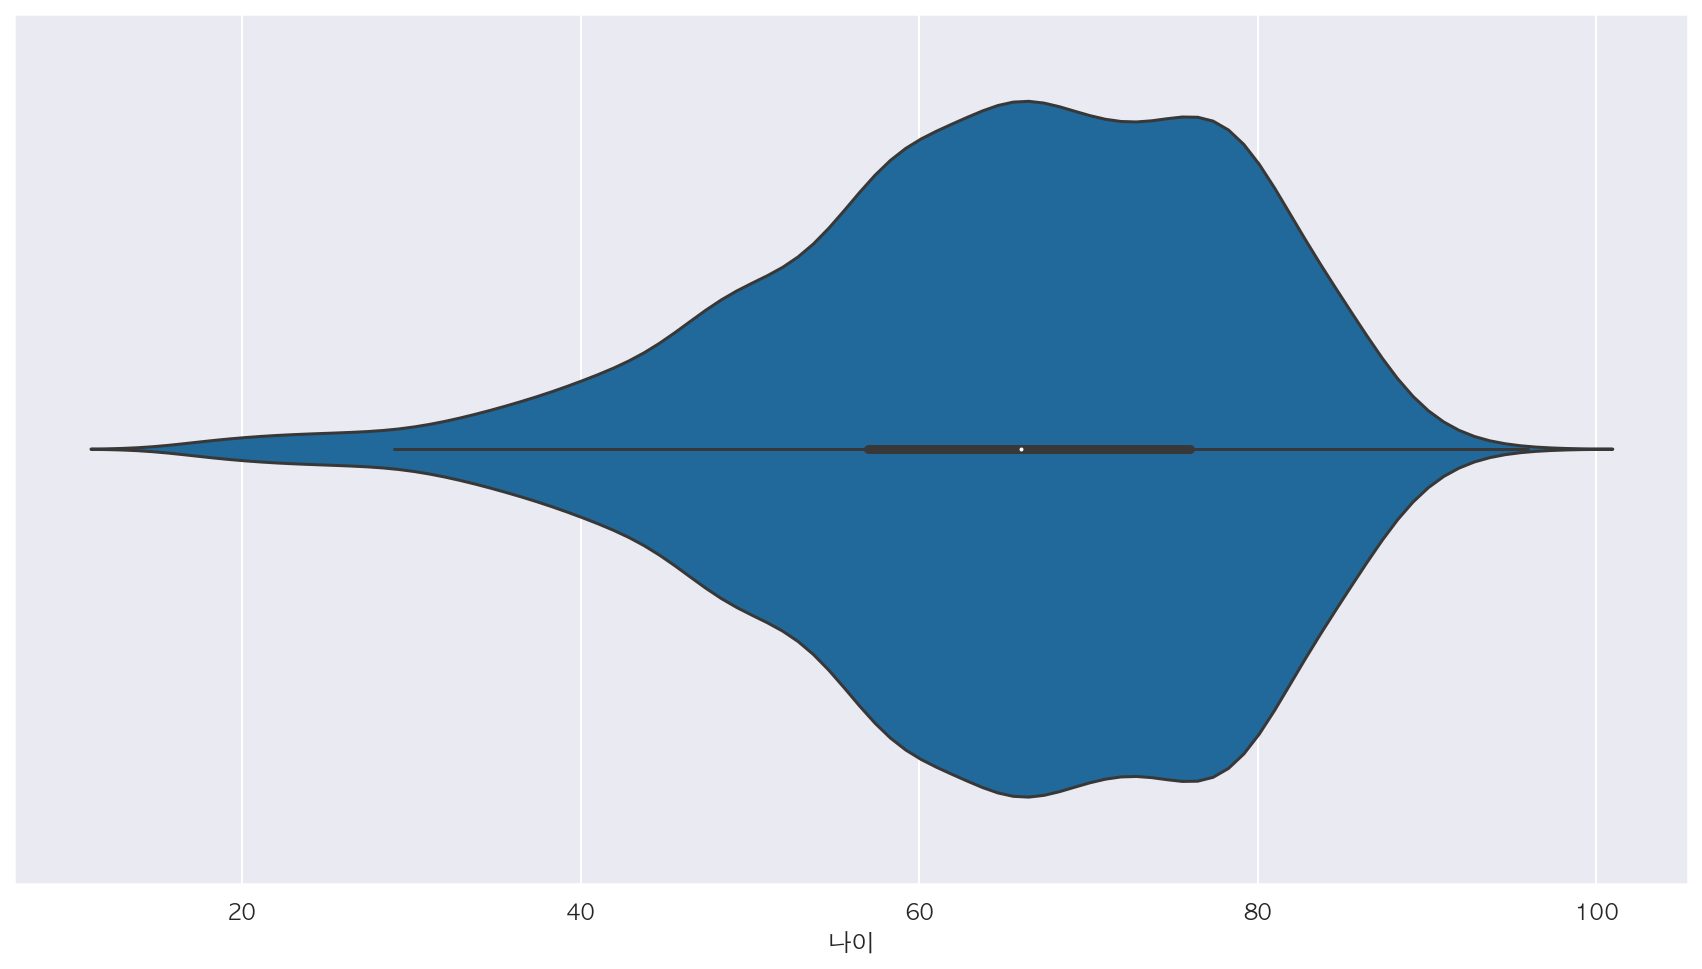

In [87]:
sns.violinplot(basic['나이'])

In [88]:
basic['나이'].describe()

count    4927.000000
mean       64.962655
std        13.564025
min        16.000000
25%        57.000000
50%        66.000000
75%        76.000000
max        96.000000
Name: 나이, dtype: float64

In [89]:
def age(x):
    if x < 65 and x > 18:
        age = 'young'
    else:
        age = 'old'
        
    return age

In [90]:
basic['age'] = basic['나이'].apply(lambda x:age(x))
basic.head()

,등록번호,키,몸무게,성별,나이,age
0,1034087,151.95,68.0,F,49,young
88,727629,159.80,60.9,M,77,old
104,1493520,137.00,59.0,F,54,young
105,1493520,137.00,59.0,F,55,young
194,281278,100.27,70.0,F,79,old


In [91]:
age = basic[['등록번호', 'age']]
age = age.drop_duplicates()
age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 123169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   등록번호    3229 non-null   int64 
 1   age     3229 non-null   object
dtypes: int64(1), object(1)
memory usage: 75.7+ KB


<AxesSubplot:xlabel='age', ylabel='Count'>

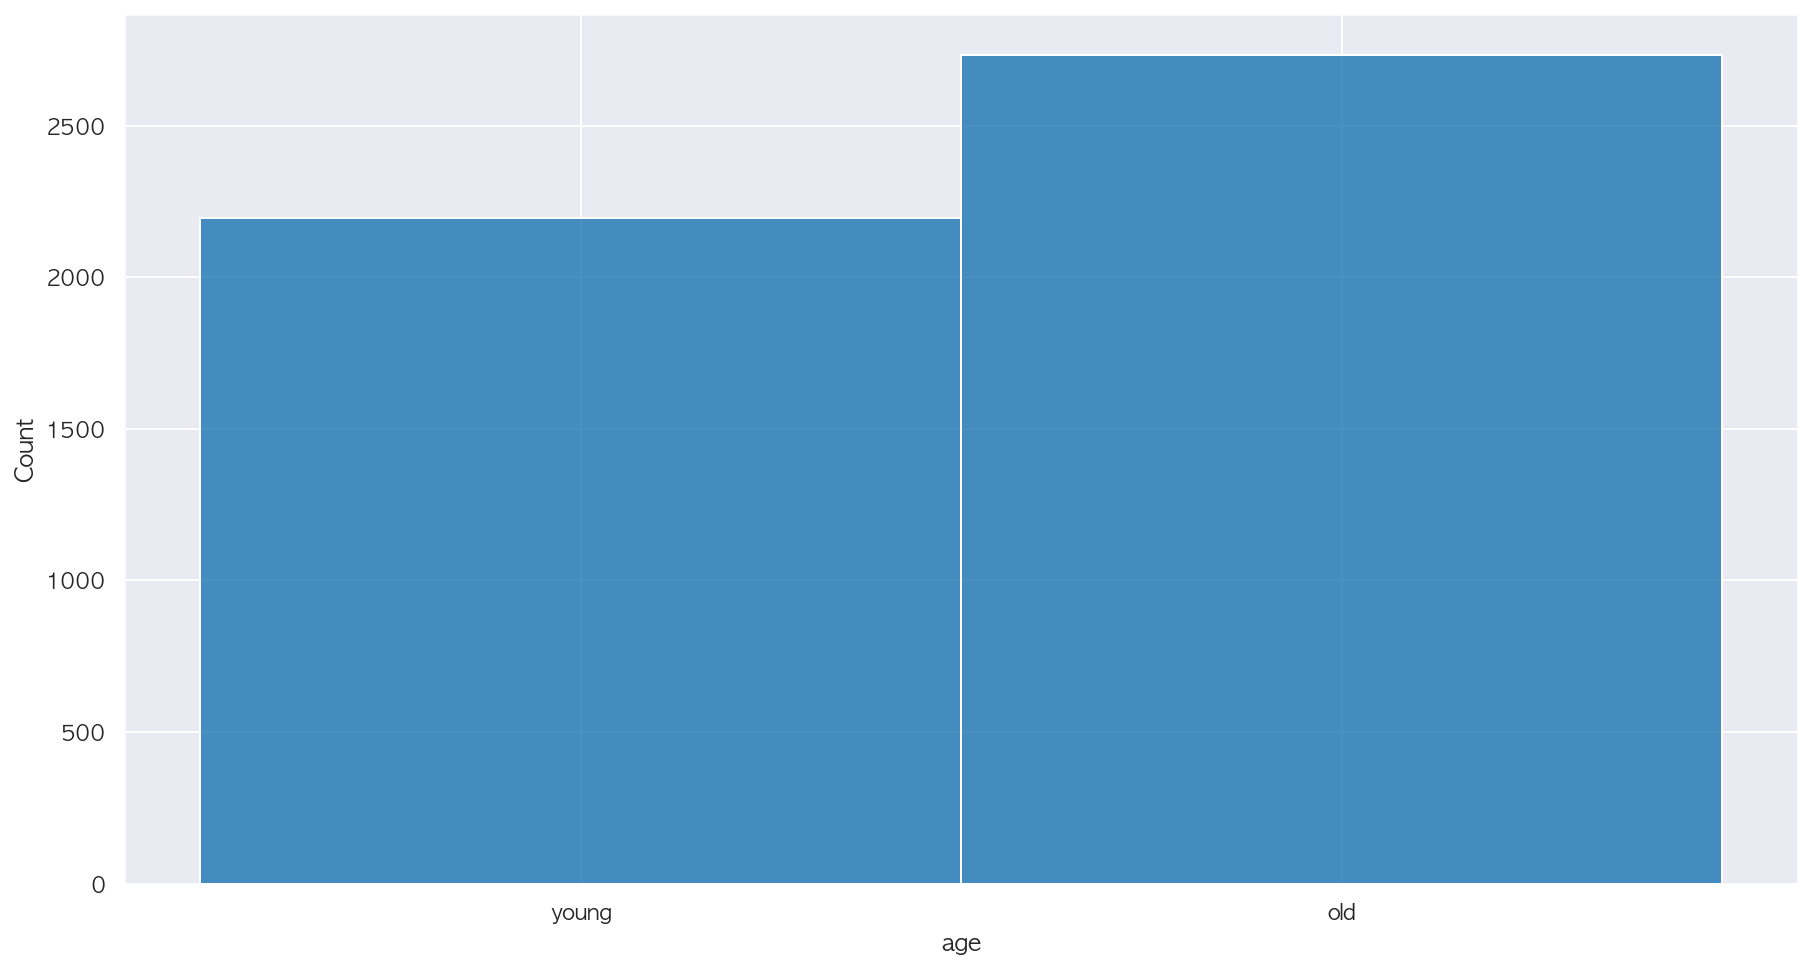

In [92]:
sns.histplot(basic['age'])

In [93]:
basic['age'].value_counts()

old      2732
young    2195
Name: age, dtype: int64

## **total_cci**

In [94]:
cci = nonfall[['등록번호', 'total_cci']]
cci = cci.drop_duplicates()
cci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3178 entries, 0 to 123169
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   등록번호       3178 non-null   int64  
 1   total_cci  3178 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 74.5 KB


<AxesSubplot:xlabel='total_cci', ylabel='Count'>

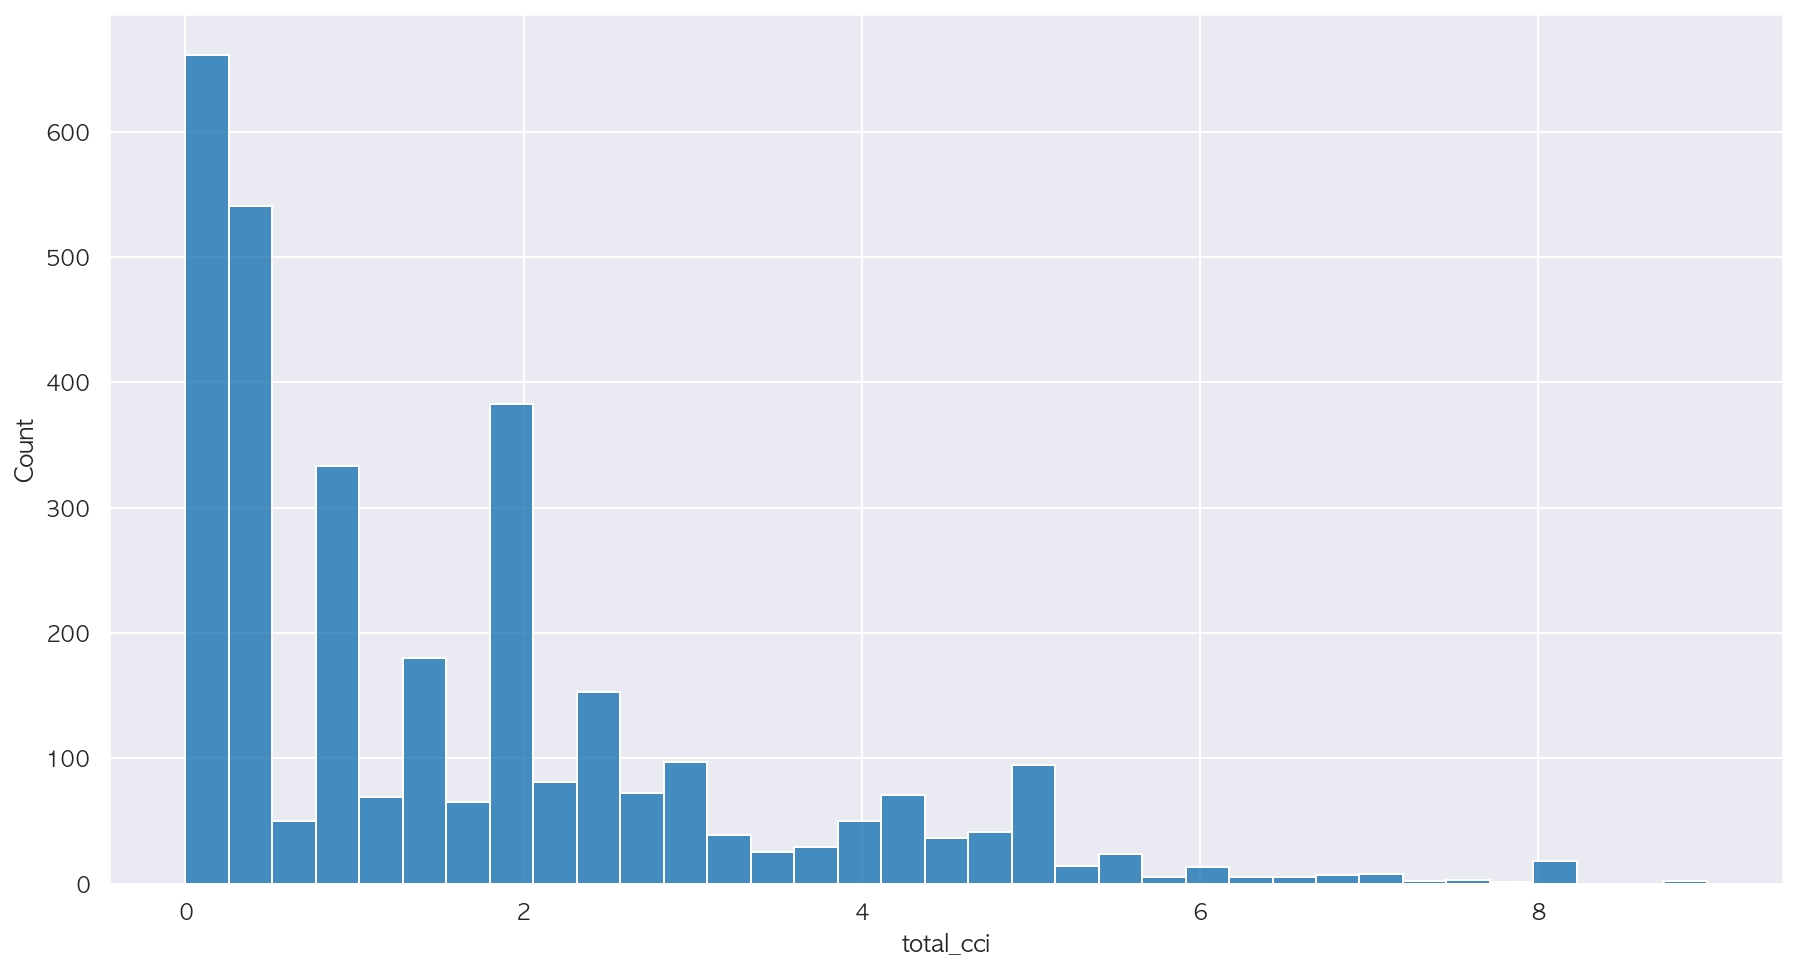

In [95]:
sns.histplot(x=cci['total_cci'])

In [96]:
cci['total_cci'].describe()

count    3178.000000
mean        1.639490
std         1.641404
min         0.000000
25%         0.500000
50%         1.100000
75%         2.400000
max         9.000000
Name: total_cci, dtype: float64

## **ADL**

<AxesSubplot:xlabel='ADL_배뇨, 배변', ylabel='count'>

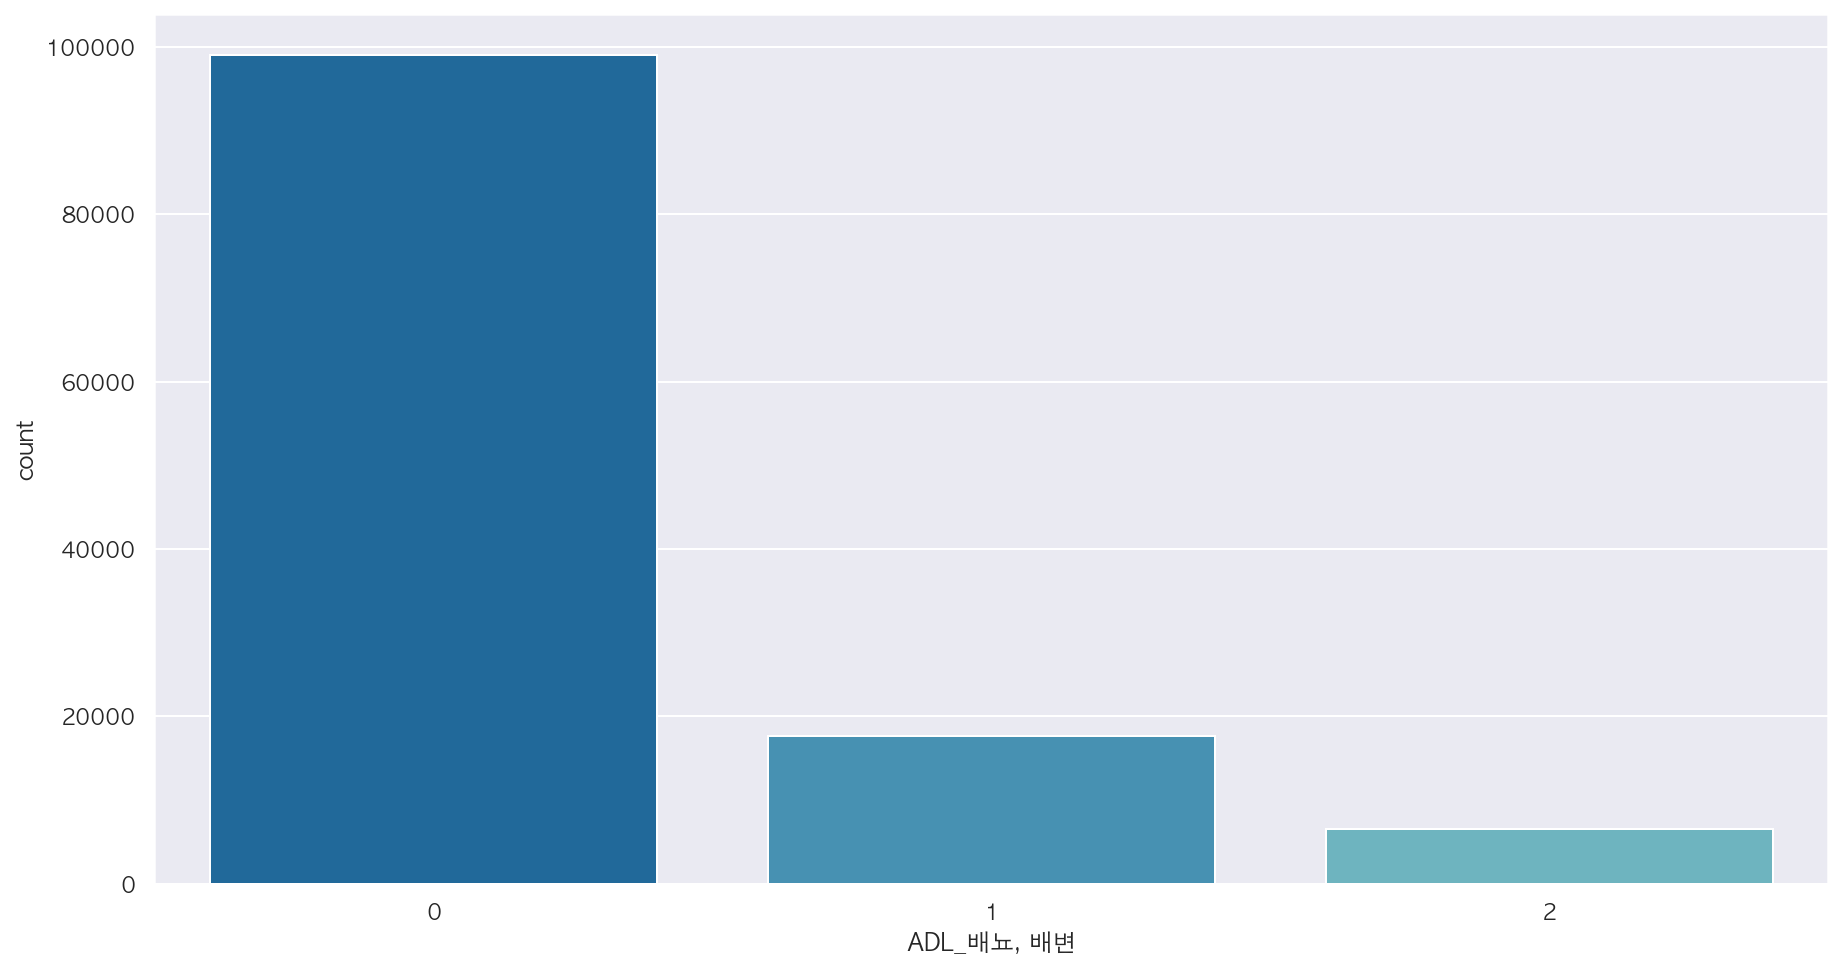

In [97]:
sns.countplot(x=nonfall['ADL_배뇨, 배변'])

In [111]:
nonfall['ADL_배뇨, 배변'].value_counts()

0    99009
1    17687
2     6474
Name: ADL_배뇨, 배변, dtype: int64

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ADL_체위변경', ylabel='count'>

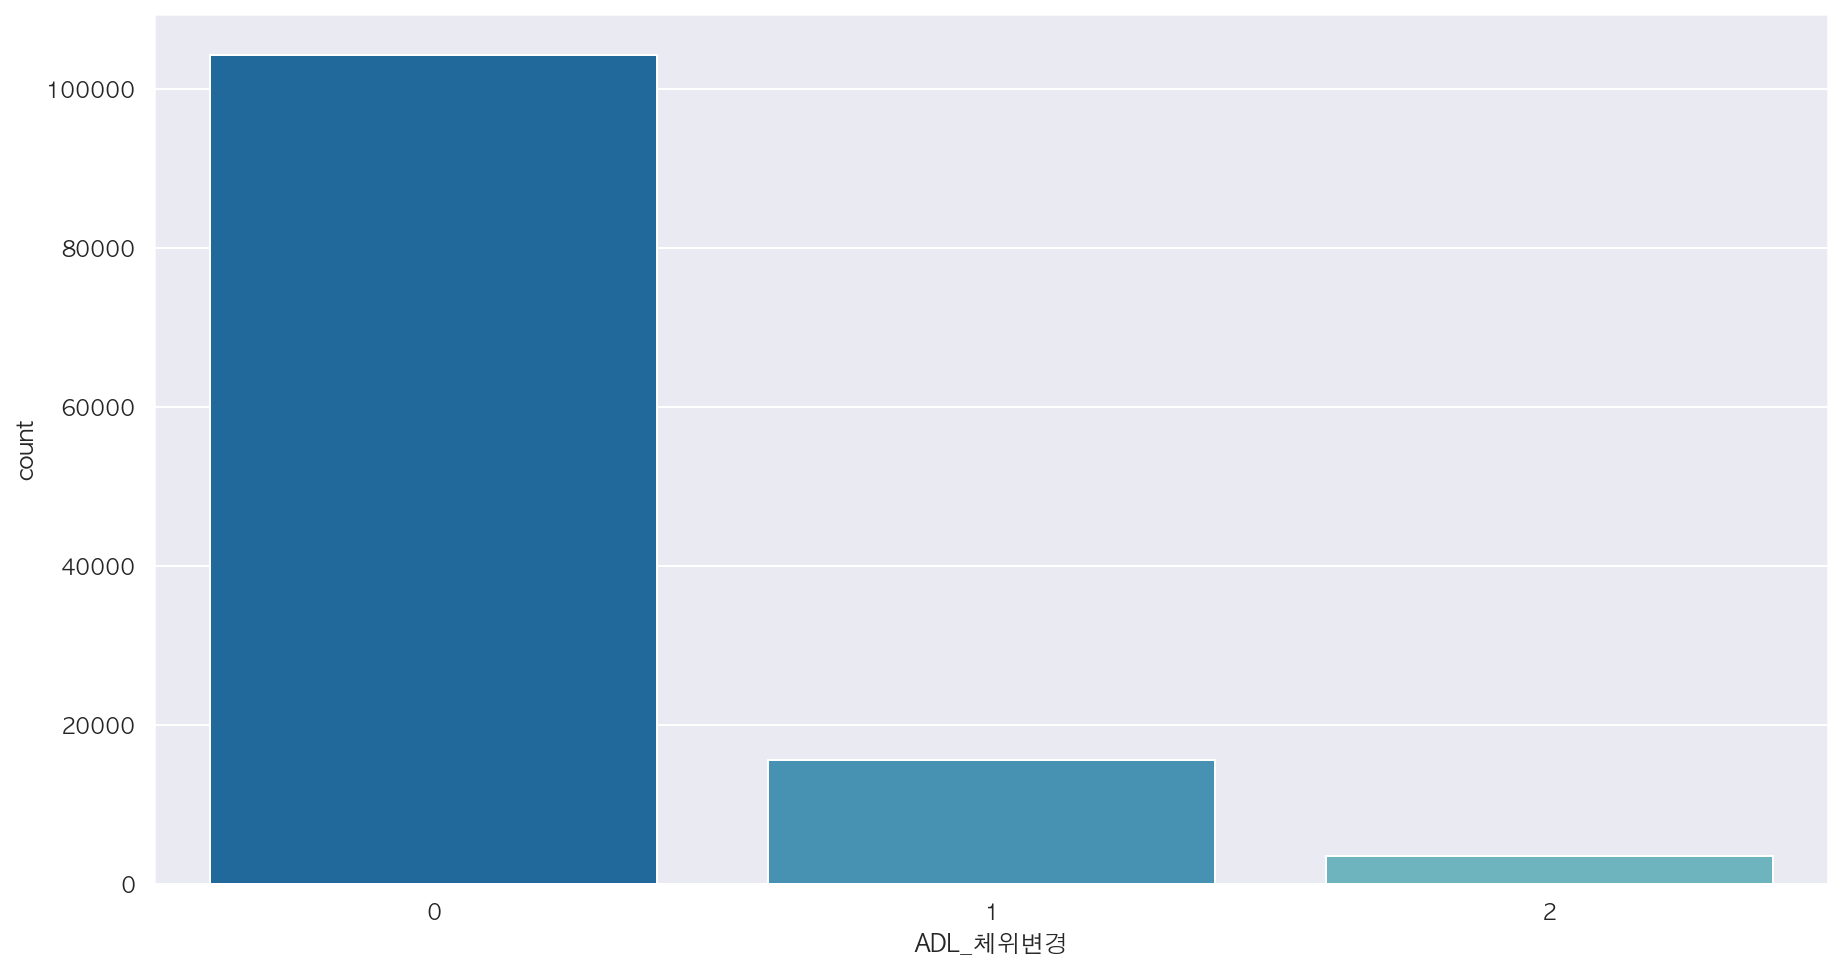

In [98]:
sns.countplot(nonfall['ADL_체위변경'])

In [112]:
nonfall['ADL_체위변경'].value_counts()

0    104217
1     15509
2      3444
Name: ADL_체위변경, dtype: int64

In [117]:
3444/(104217+15509+3444)

0.027961354225866687

<AxesSubplot:xlabel='ADL_침상 밖으로 이동', ylabel='count'>

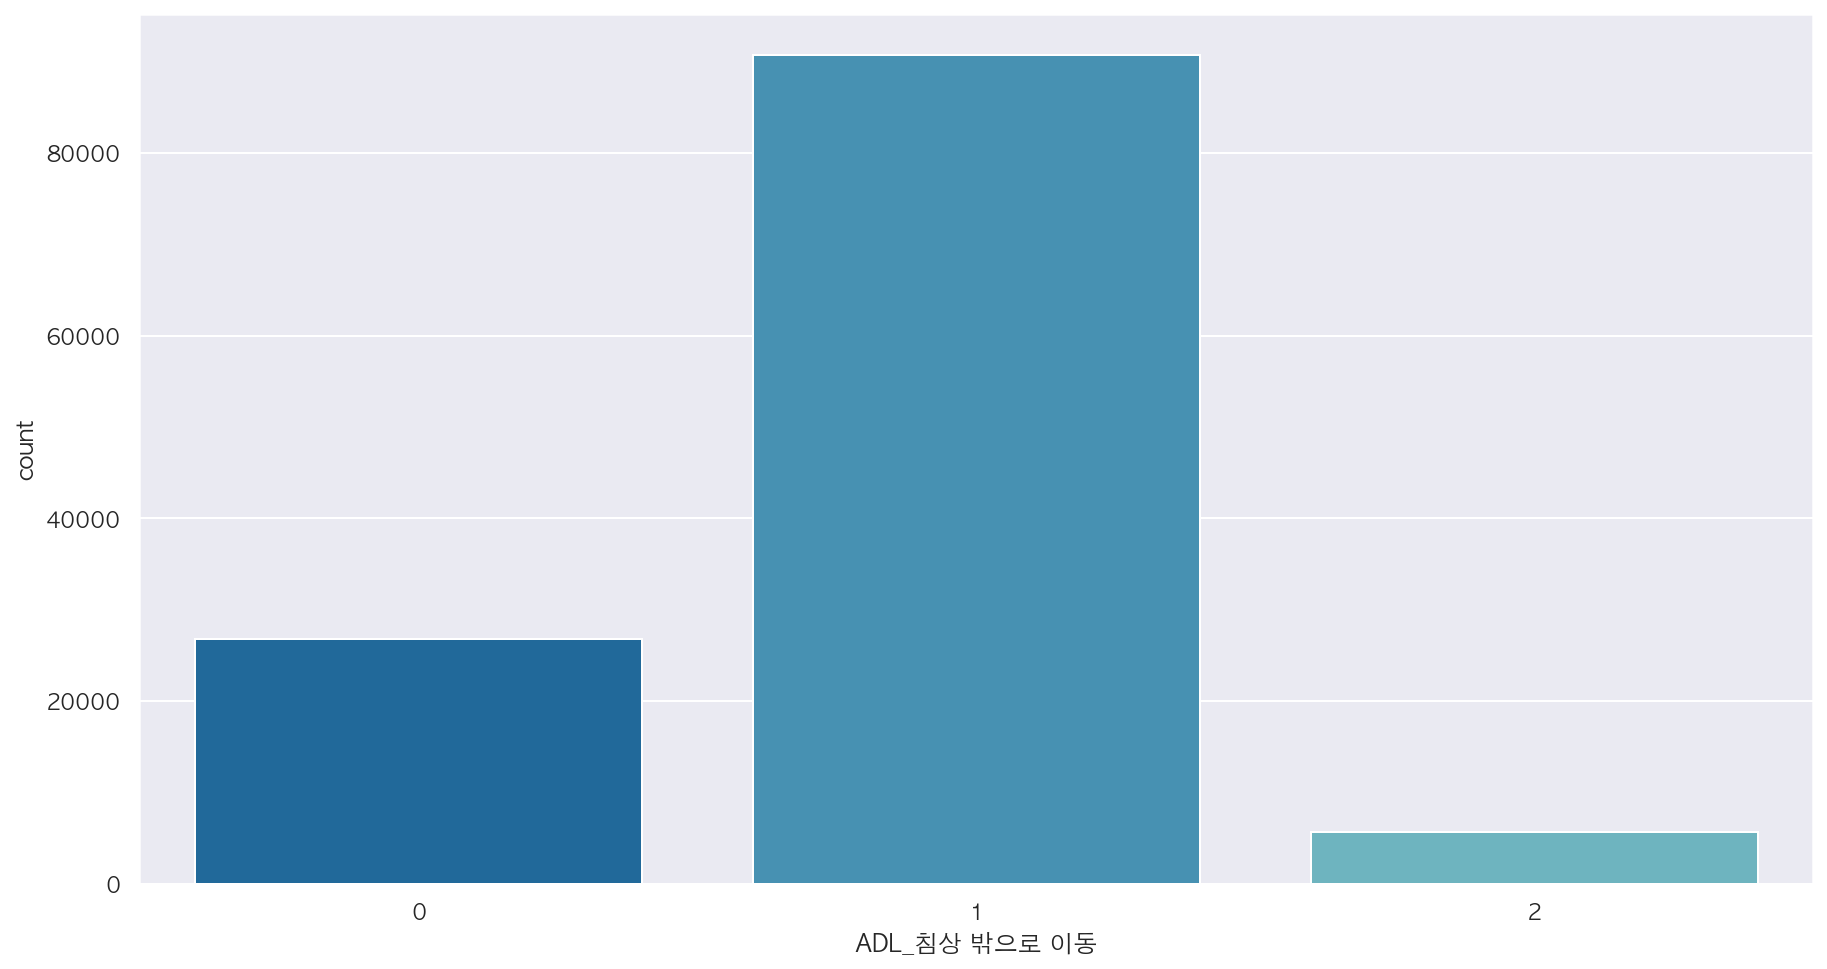

In [99]:
sns.countplot(x=nonfall['ADL_침상 밖으로 이동'])

In [119]:
nonfall['ADL_침상 밖으로 이동'].value_counts()

1    90739
0    26819
2     5612
Name: ADL_침상 밖으로 이동, dtype: int64

In [122]:
5612/(90739+26819+5612)

0.04556304294876999

<AxesSubplot:xlabel='ADL_식사섭취', ylabel='count'>

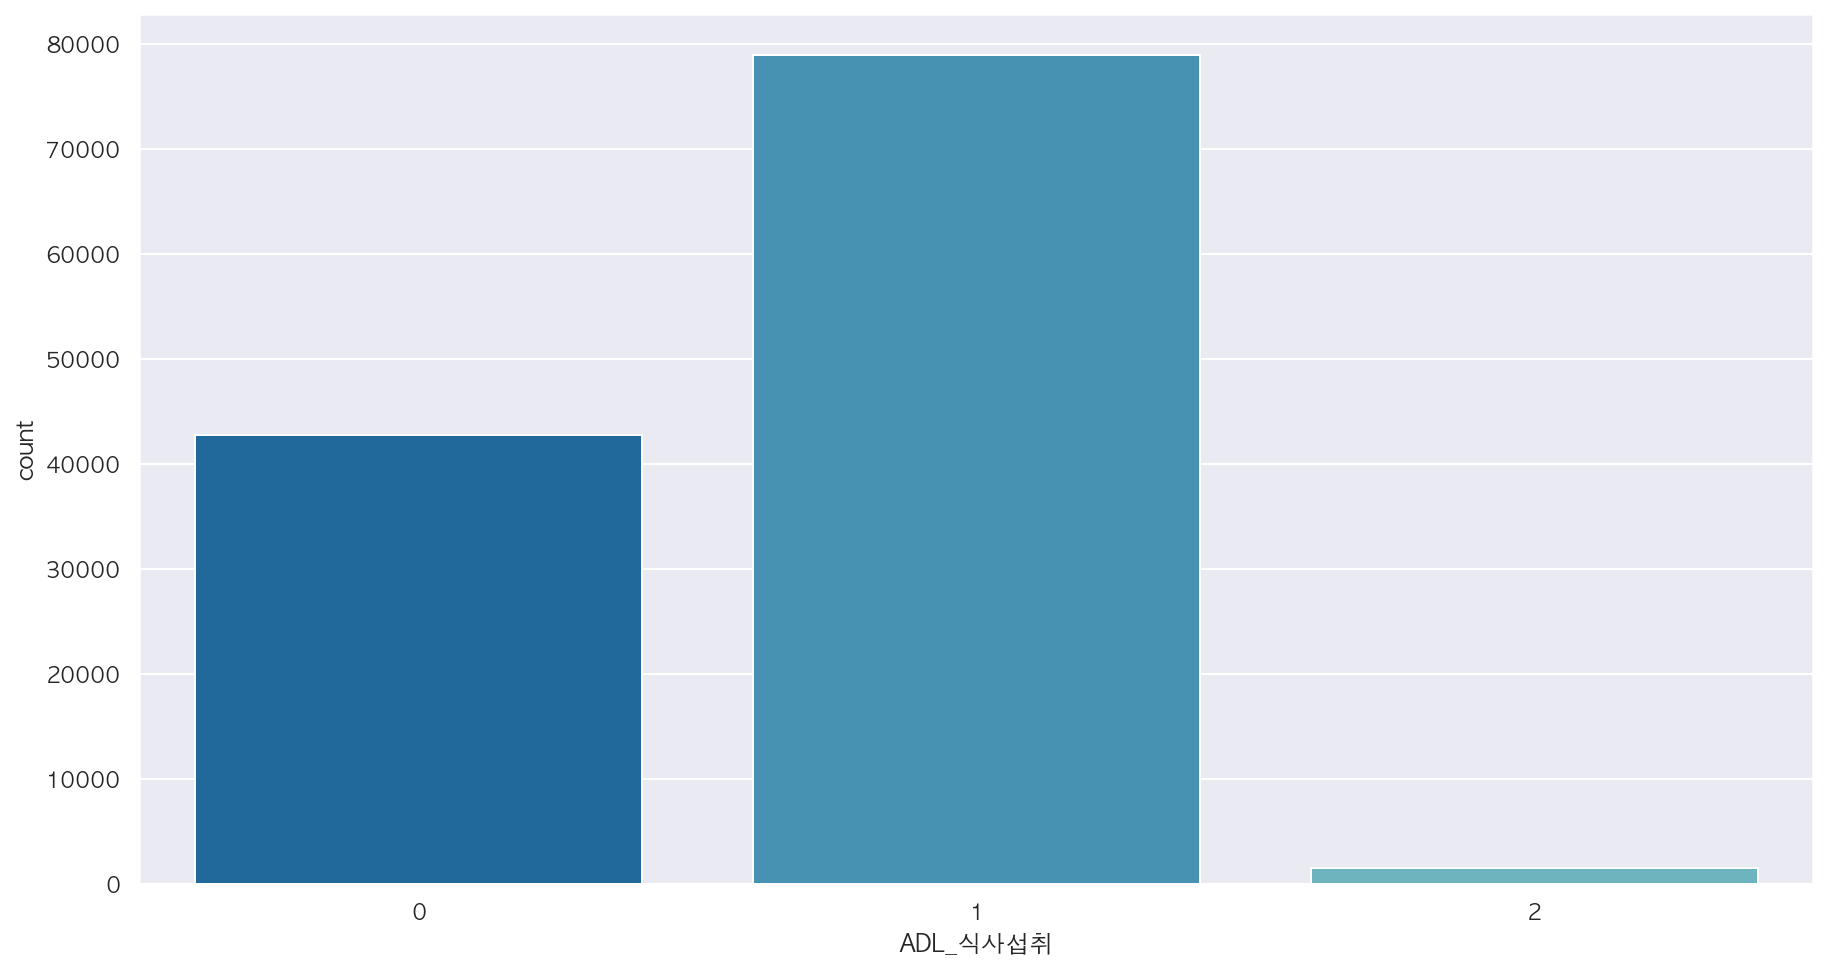

In [100]:
sns.countplot(x=nonfall['ADL_식사섭취'])

In [124]:
nonfall['ADL_식사섭취'].value_counts()

1    78914
0    42745
2     1511
Name: ADL_식사섭취, dtype: int64

In [128]:
1511/(42745+78914+1511)

0.012267597629292847

<AxesSubplot:xlabel='호흡 간호_비침습적 산소 투여', ylabel='count'>

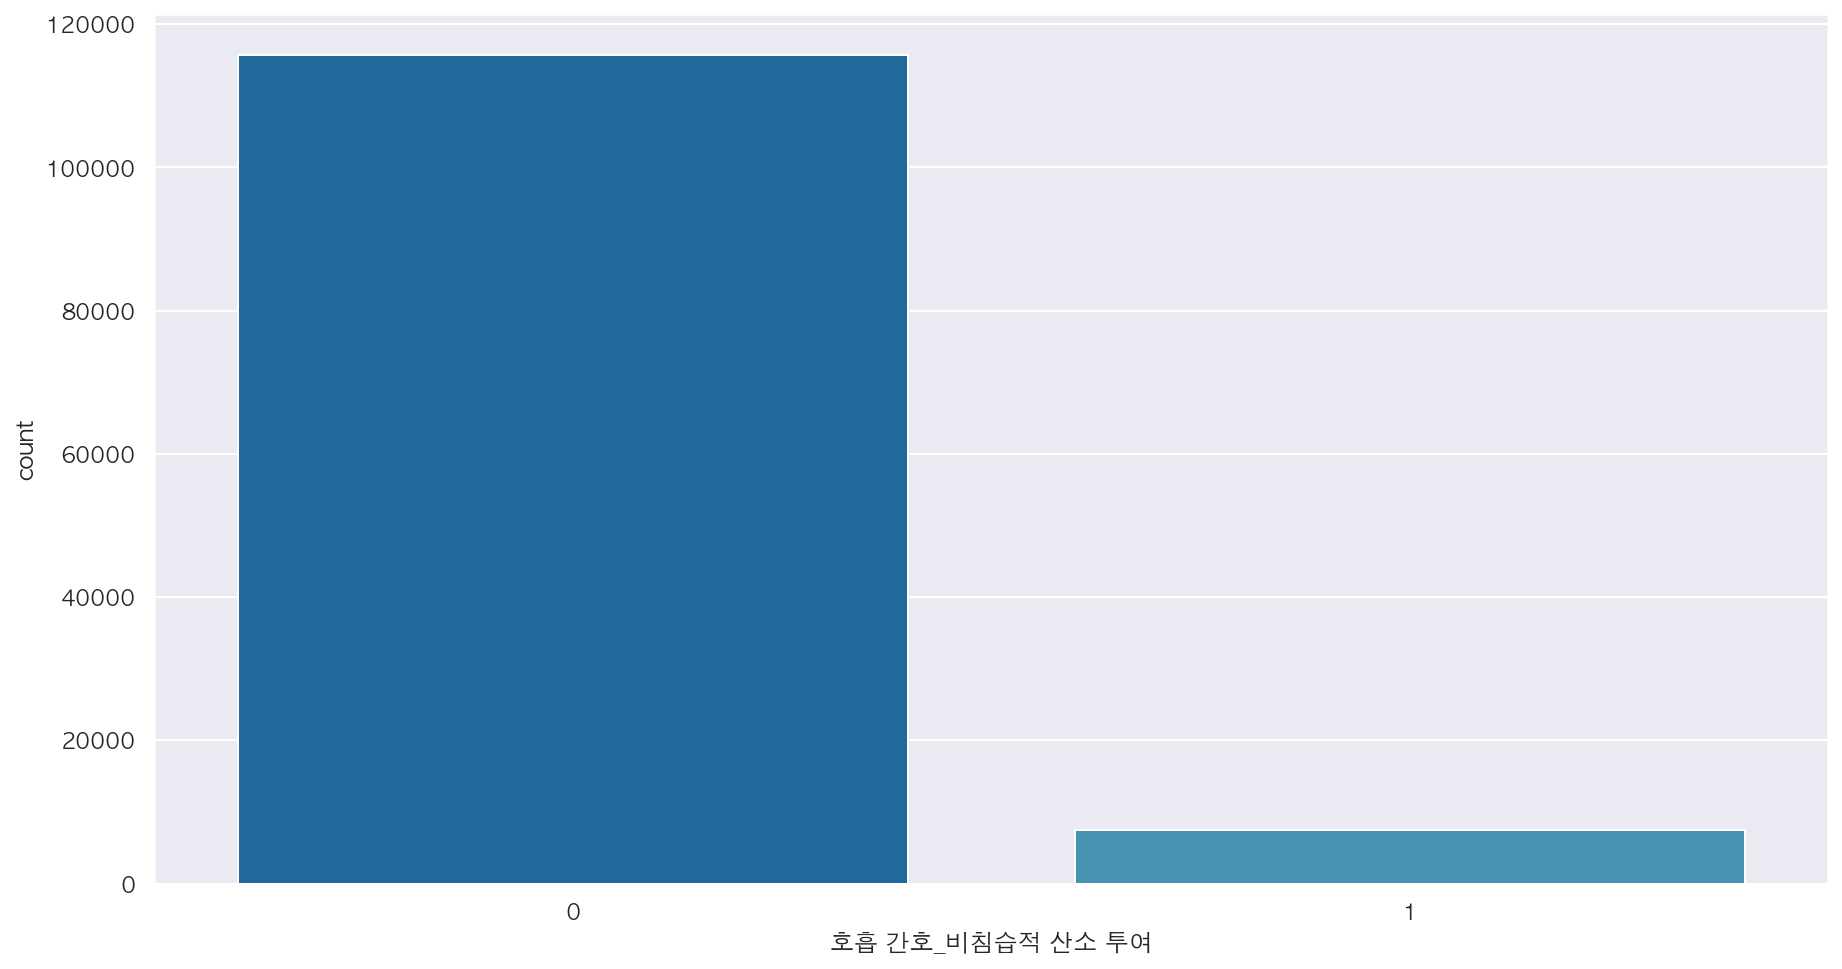

In [101]:
sns.countplot(x=nonfall['호흡 간호_비침습적 산소 투여'])

In [129]:
nonfall['호흡 간호_비침습적 산소 투여'].value_counts()

0    115669
1      7501
Name: 호흡 간호_비침습적 산소 투여, dtype: int64

In [131]:
7501/(115669+7501)

0.06089956970041406

## **통증 강도**

In [102]:
nonfall['통증강도'] = nonfall['통증강도'].replace('-',0)

In [103]:
nonfall['통증강도'] = nonfall['통증강도'].astype(float)

In [104]:
pain = nonfall[['등록번호', '통증강도']]
pain = pain.drop_duplicates()
pain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4038 entries, 0 to 123169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   등록번호    4038 non-null   int64  
 1   통증강도    4038 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 94.6 KB


/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='통증강도'>

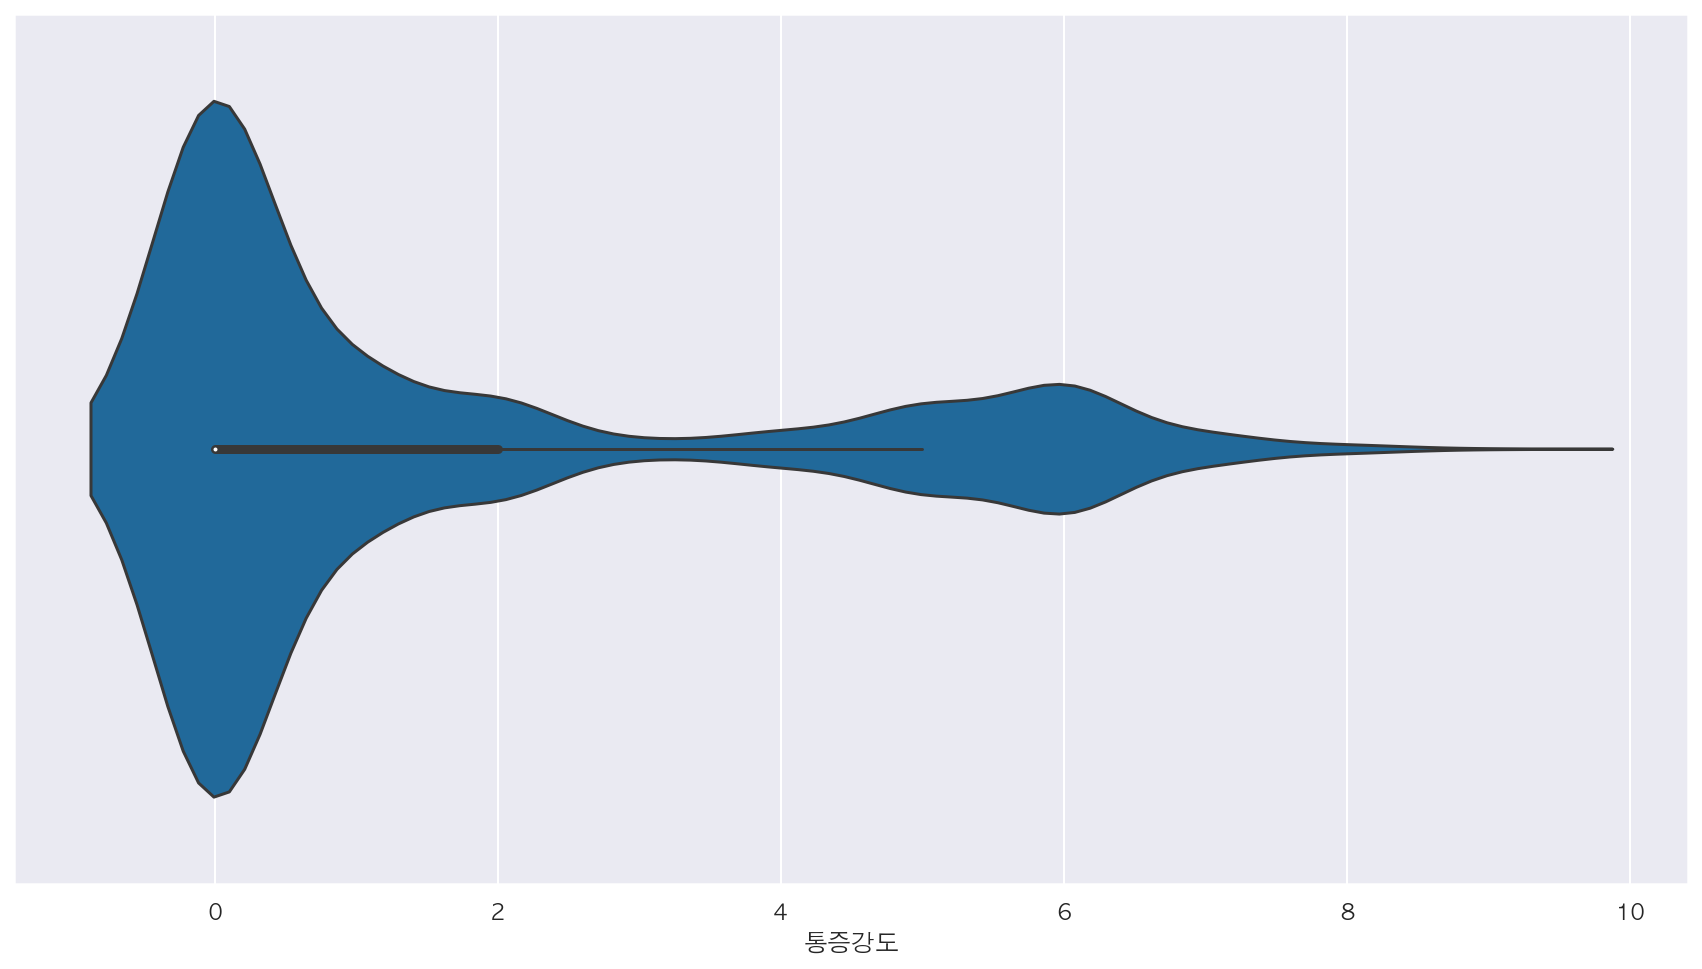

In [105]:
sns.violinplot(pain['통증강도'])

In [106]:
pain['통증강도'].describe()

count    4038.000000
mean        1.556464
std         2.307145
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         9.000000
Name: 통증강도, dtype: float64

## **욕창**

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='욕창_행동', ylabel='count'>

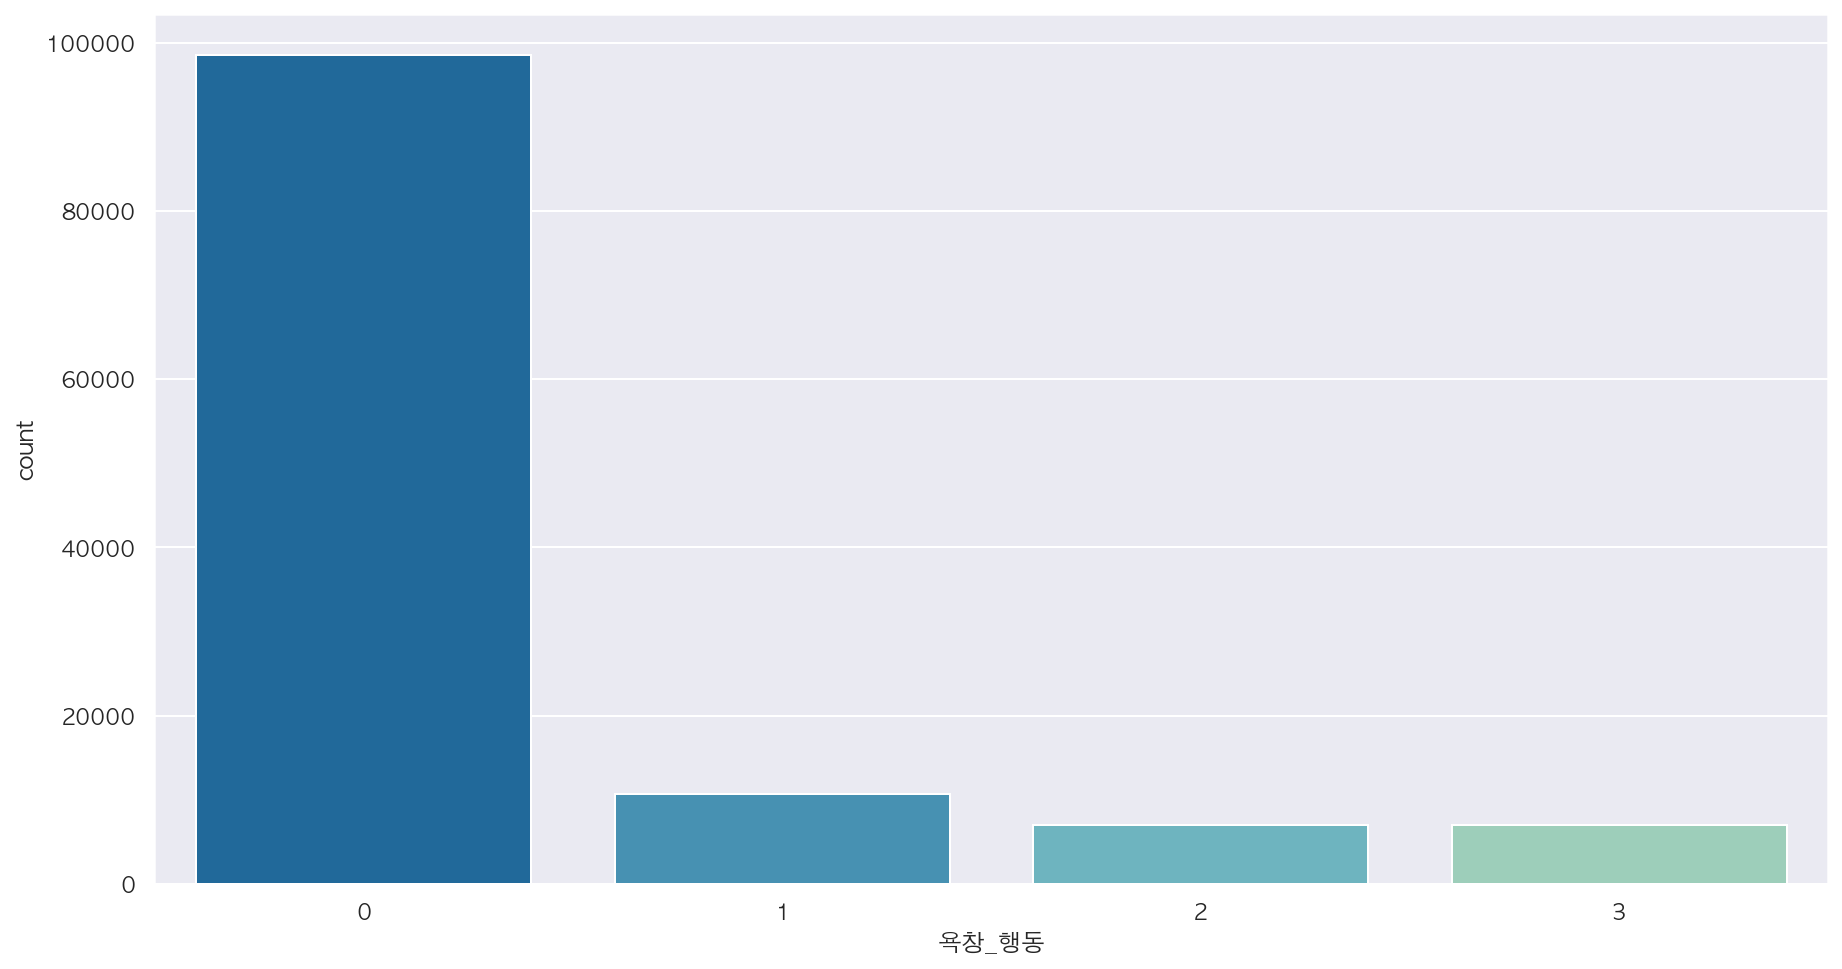

In [107]:
sns.countplot(nonfall['욕창_행동'])

In [133]:
nonfall['욕창_행동'].value_counts()

0    98578
1    10653
2     7019
3     6920
Name: 욕창_행동, dtype: int64

In [137]:
6920/(98578+10653+7019+6920)

0.056182511975318664

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='욕창_영양', ylabel='count'>

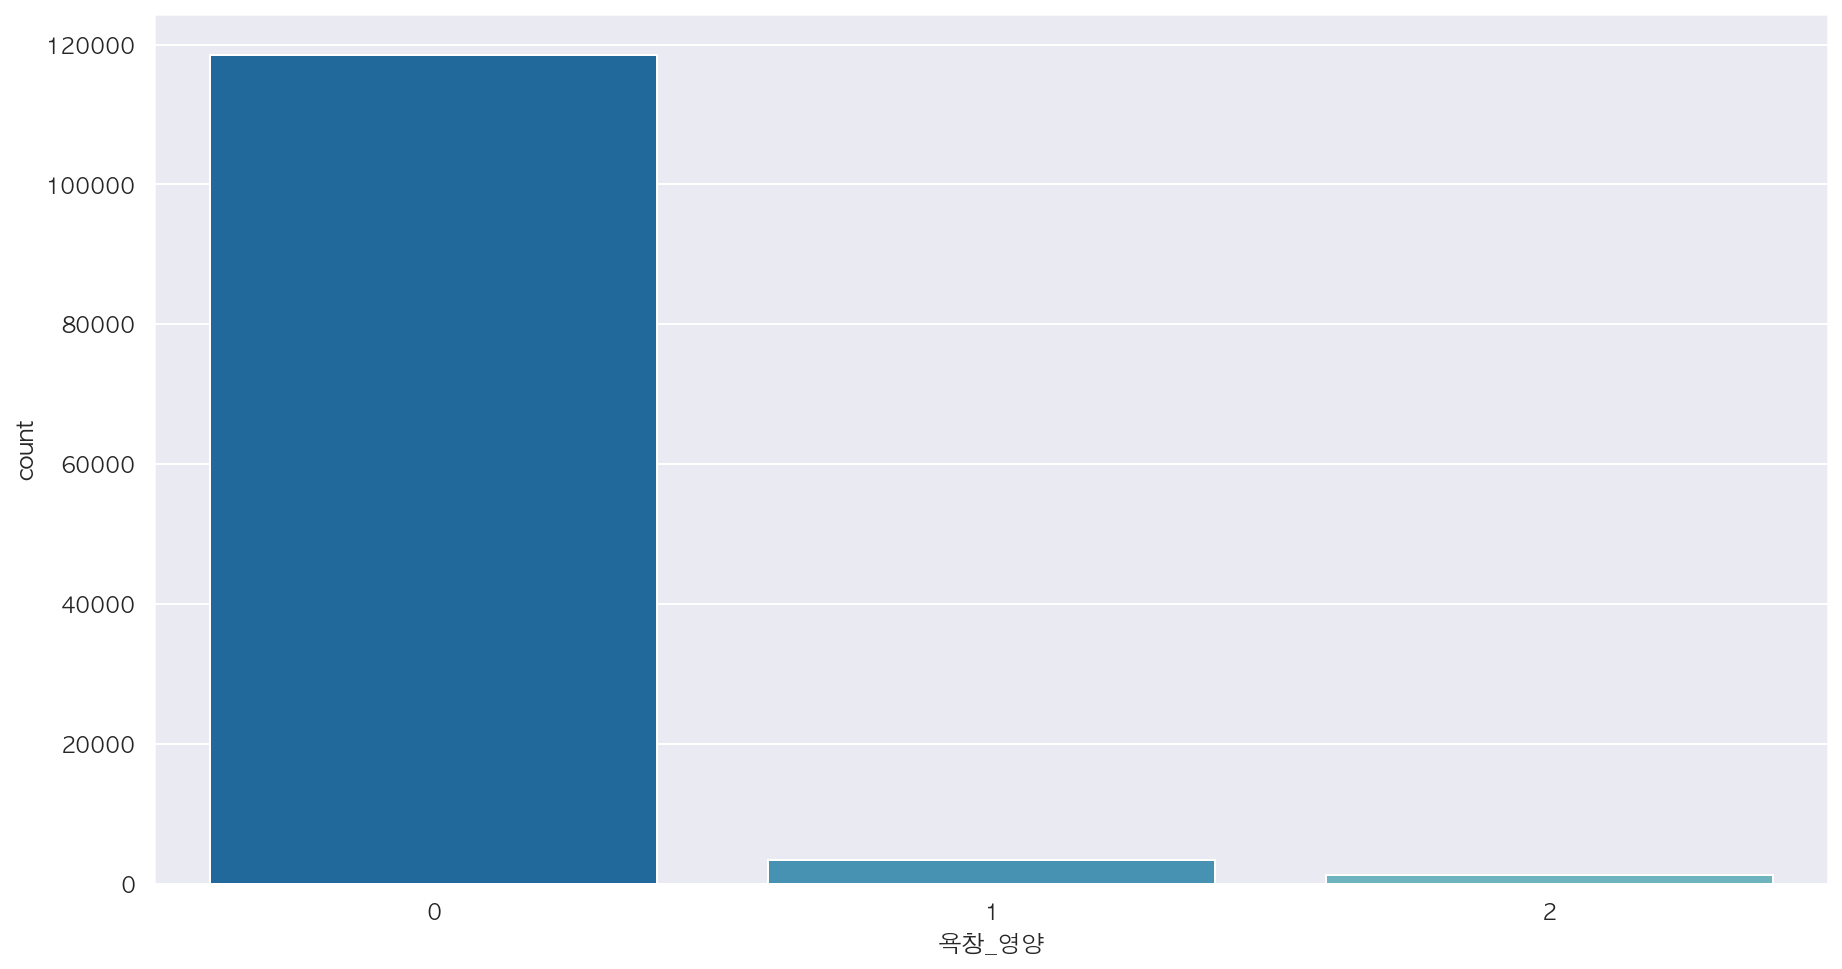

In [108]:
sns.countplot(nonfall['욕창_영양'])

/Users/yena/miniforge3/envs/python_study_3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='욕창_영양', ylabel='count'>

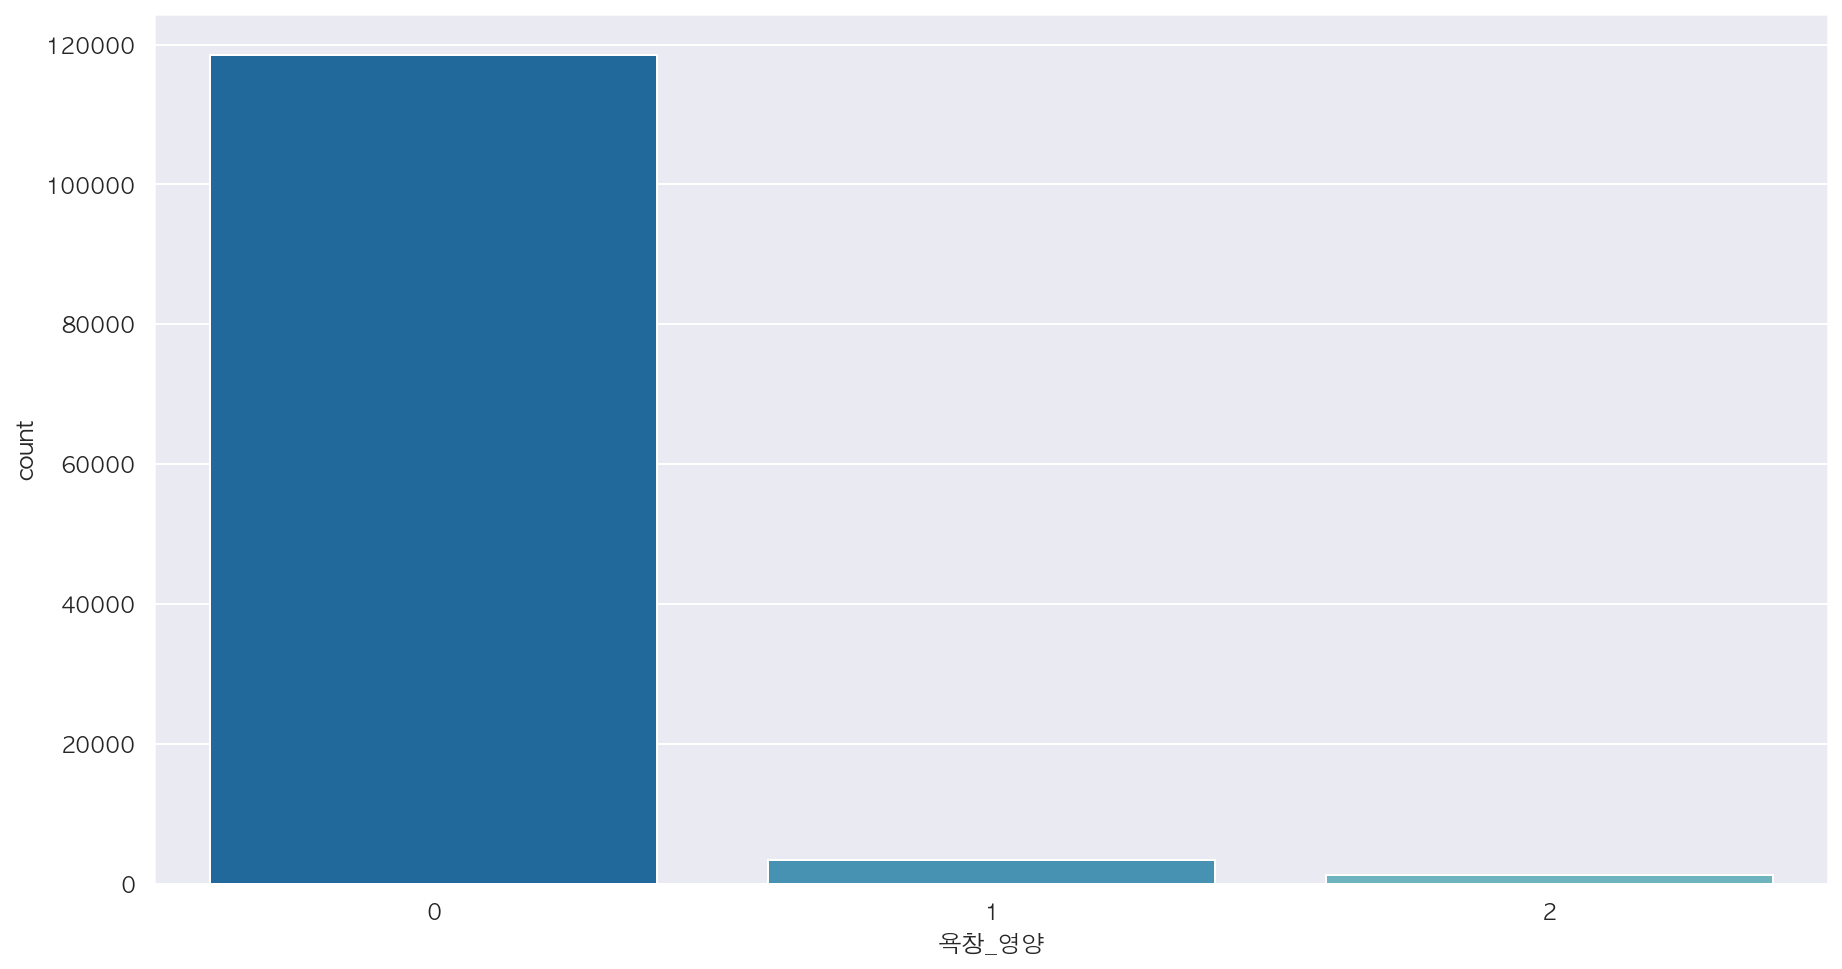

In [109]:

sns.set_palette('GnBu_r')
sns.countplot(nonfall['욕창_영양'])

In [138]:
nonfall['욕창_영양'].value_counts()

0    118486
1      3446
2      1238
Name: 욕창_영양, dtype: int64

In [141]:
1238/(118486+3446+1238)

0.010051148818705854